In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import explained_variance_score

* Built the first model using just the continuous variables and the value of variance Explained was: 0.3
* Built the second one after adding dummy variables for transmision and the variance explained increased to: 0.38 :)

In [30]:
# Continuous: odometer_value, engine_capacity, duration_listed
# Categorical: manufacturer_name, model_name, transmission, color, engine_fuel, engine_has_gas, engine_type, body_type, has_warranty, state, drivetrain, is_exchangeable, location_region, feature_0 to 9
# Confusing: year_produced, number_of_photos, up_counter
# Target: price_usd

cars = pd.read_csv('../mydata/cars.csv')
cars.info(),cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

(None,
   manufacturer_name model_name transmission   color  odometer_value  \
 0            Subaru    Outback    automatic  silver          190000   
 1            Subaru    Outback    automatic    blue          290000   
 2            Subaru   Forester    automatic     red          402000   
 3            Subaru    Impreza   mechanical    blue           10000   
 4            Subaru     Legacy    automatic   black          280000   
 
    year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
 0           2010    gasoline           False    gasoline              2.5   
 1           2002    gasoline           False    gasoline              3.0   
 2           2001    gasoline           False    gasoline              2.5   
 3           1999    gasoline           False    gasoline              3.0   
 4           2001    gasoline           False    gasoline              2.5   
 
    ... feature_1  feature_2 feature_3 feature_4  feature_5  feature_6  \
 0  ...      Tr

[]

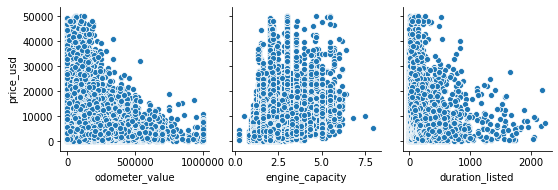

In [7]:
sns.pairplot(cars, x_vars=['odometer_value', 'engine_capacity', 'duration_listed'], y_vars = ['price_usd'])
plt.plot()

[]

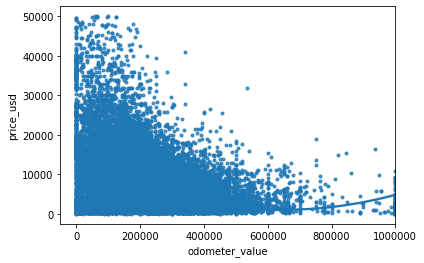

In [8]:
sns.regplot(x="odometer_value", y="price_usd", data=cars, order=2,marker='.')
plt.plot()

[]

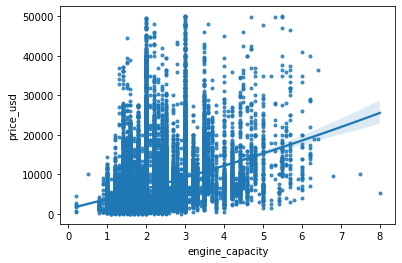

In [9]:
sns.regplot(x="engine_capacity", y="price_usd", data=cars, order=2,marker='.')
plt.plot()

[]

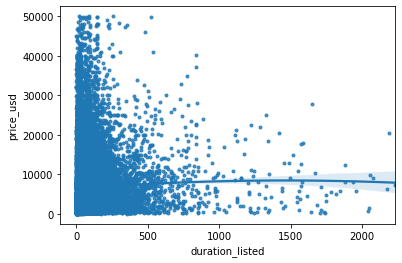

In [10]:
sns.regplot(x="duration_listed", y="price_usd", data=cars, order=2,marker='.')
plt.plot()

[]

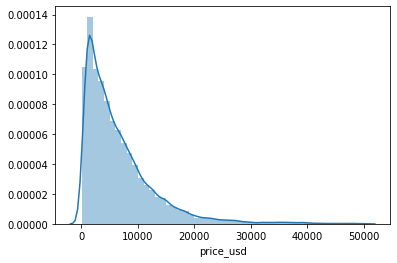

In [11]:
sns.distplot(cars['price_usd'])
plt.plot()

[]

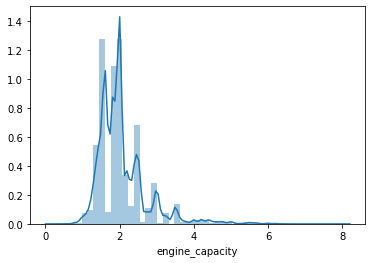

In [12]:
sns.distplot(cars['engine_capacity'])
plt.plot()

[]

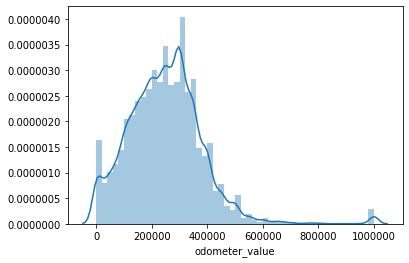

In [13]:
sns.distplot(cars['odometer_value'])
plt.plot()

[]

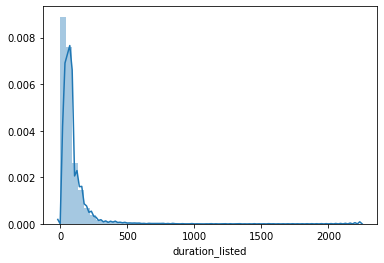

In [14]:
sns.distplot(cars['duration_listed'])
plt.plot()

In [34]:
cars = pd.read_csv('../mydata/cars.csv')
cars.engine_capacity.fillna(cars.engine_capacity.mean(), inplace=True)
dummies = pd.get_dummies(cars['transmission'])
cars = pd.concat([cars, dummies], axis=1)
cars.drop(['transmission'], axis=1, inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   color              38531 non-null  object 
 3   odometer_value     38531 non-null  int64  
 4   year_produced      38531 non-null  int64  
 5   engine_fuel        38531 non-null  object 
 6   engine_has_gas     38531 non-null  bool   
 7   engine_type        38531 non-null  object 
 8   engine_capacity    38531 non-null  float64
 9   body_type          38531 non-null  object 
 10  has_warranty       38531 non-null  bool   
 11  state              38531 non-null  object 
 12  drivetrain         38531 non-null  object 
 13  price_usd          38531 non-null  float64
 14  is_exchangeable    38531 non-null  bool   
 15  location_region    38531 non-null  object 
 16  number_of_photos   385

In [37]:
X = cars[['odometer_value', 'engine_capacity', 'duration_listed', 'automatic', 'mechanical']].values
y = cars['price_usd'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [38]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
coeff_df = pd.DataFrame(regressor.coef_, ['odometer_value', 'engine_capacity', 'duration_listed', 'automatic', 'mechanical'], columns=['Coefficient'])  
coeff_df

,Coefficient
odometer_value,-0.017721
engine_capacity,1976.699774
duration_listed,0.486316
automatic,2022.829409
mechanical,-2022.829409


In [41]:
y_pred = regressor.predict(X_test)

In [42]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

,Actual,Predicted
0,3500.0,10062.364815
1,5450.0,9302.539450
2,3000.0,9971.223329
3,5490.0,5582.548417
4,1990.0,4380.306126
5,10900.0,11300.521795
6,1500.0,1929.754162
7,2000.0,4291.624996
8,1200.0,4330.758396
9,1350.0,2851.234453


In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred, multioutput='uniform_average'))

Mean Absolute Error: 3507.7824167047647
Mean Squared Error: 26044663.889054615
Root Mean Squared Error: 5103.39728896885
Explained Variance Score: 0.37760000215787726


In [86]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [87]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.99999312e-01 6.87515575e-07 2.38954661e-11]
[2.67097286e+07 2.21467954e+04 1.30565181e+02]
